#### Importando as LIBS

In [251]:

import numpy as np
import pandas as pd

import yfinance as yf
import openpyxl 
import datetime as dt

import seaborn as sns
import plotly.graph_objects as Dash
import plotly.express as px
import matplotlib.pyplot as plt


#### Importando os dados Ibovepa

In [252]:

ibovespa = yf.download(tickers='^BVSP', period='1y')['Adj Close']

[*********************100%***********************]  1 of 1 completed


#### Verificando DataFrame

In [253]:

ibovespa.head(15)

Ticker,^BVSP
Date,
2024-01-29,128503.0
2024-01-30,127402.0
2024-01-31,127752.0
2024-02-01,128481.0
2024-02-02,127182.0
2024-02-05,127593.0
2024-02-06,130416.0
2024-02-07,129608.0
2024-02-08,128217.0


#### Valores duplicados

In [254]:
ibovespa.duplicated().sum()

np.int64(7)

#### Info

In [255]:
ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-29 to 2025-01-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^BVSP   251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


#### Estatisticas

In [256]:
ibovespa.describe()

Ticker,^BVSP
count,251.000000
mean,127590.527888
std,4203.169899
min,118533.000000
25%,124993.000000
50%,127698.000000
75%,129977.000000
max,137344.000000


#### Estilos do gráfico

In [257]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### média móvel

In [258]:
media_movel = ibovespa['^BVSP'].rolling(5).mean()

#### Gráfico

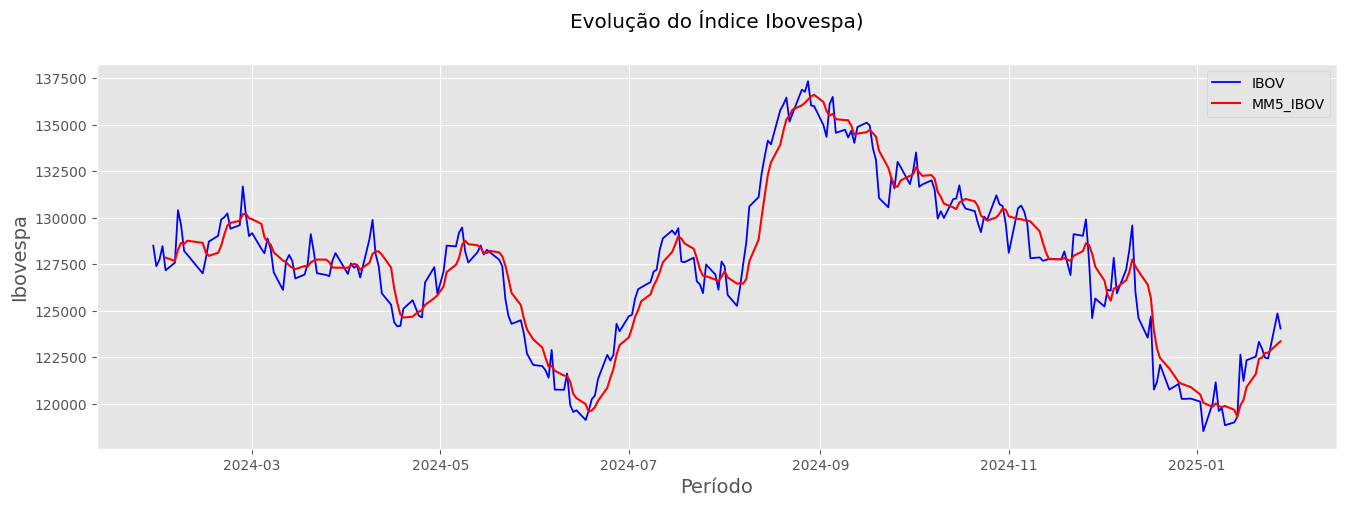

In [259]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Evolução do Índice Ibovespa)', pad=26)
plt.plot(ibovespa.index, ibovespa['^BVSP'], color='blue', linewidth=1.3, label='IBOV')
plt.plot(media_movel, color='red', label='MM5_IBOV')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Ibovespa', fontsize=14)
plt.legend();


#### Carteira de ativos 

In [260]:
tickers = ['PETR4.SA', 'WEGE3.SA', 'VALE']
carteira = yf.download(tickers=tickers, period='1y')['Adj Close']
carteira

[*********************100%***********************]  3 of 3 completed


Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-01-29,33.134029,12.796144,32.666039
2024-01-30,32.929848,12.704678,32.410603
2024-01-31,33.289204,12.521745,31.772022
2024-02-01,33.950745,12.549185,32.056931
2024-02-02,33.509712,12.155879,32.017635
...,...,...,...
2025-01-22,37.090000,8.870000,56.439999
2025-01-23,36.830002,8.890000,57.250000
2025-01-24,36.639999,8.980000,57.869999


#### Informações da Carteira

In [261]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2024-01-29 to 2025-01-28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  251 non-null    float64
 1   VALE      251 non-null    float64
 2   WEGE3.SA  251 non-null    float64
dtypes: float64(3)
memory usage: 8.1 KB


#### Verificando valores nulos da carteira

In [262]:
carteira.isnull().sum()

Ticker
PETR4.SA    8
VALE        8
WEGE3.SA    8
dtype: int64

#### Mapa de calor nulos

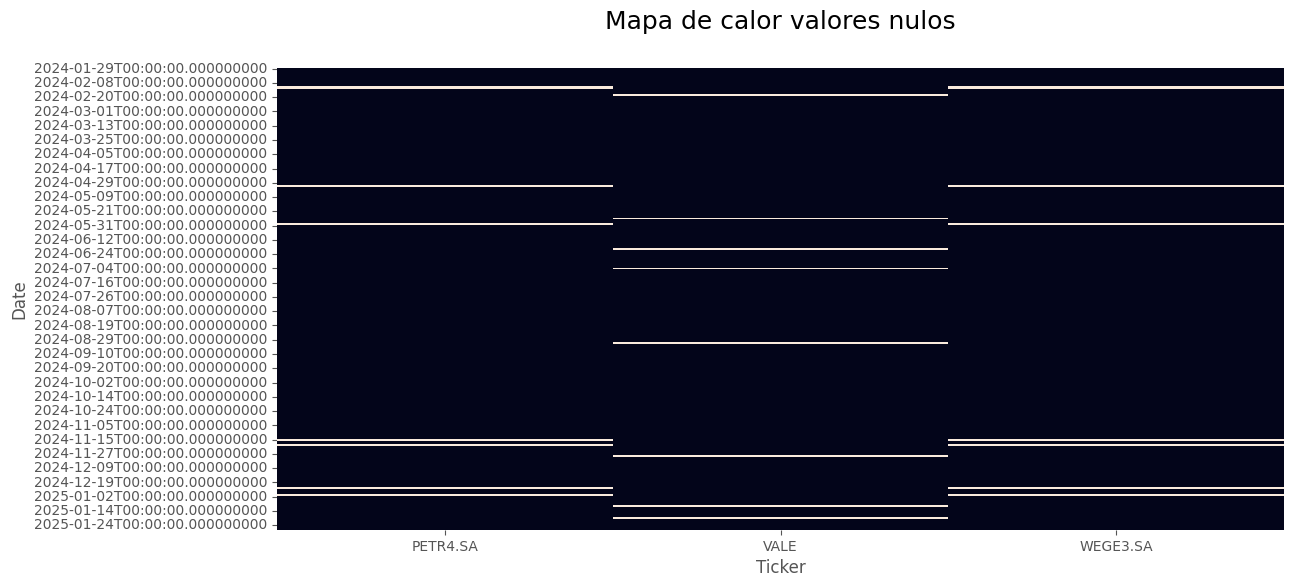

In [263]:
plt.figure(figsize=(13,6))
plt.title('Mapa de calor valores nulos', fontsize=18, pad=28)
sns.heatmap(carteira.isnull(), cbar=False);

#### Estatisticas da Carteira

In [264]:
carteira.describe()

Ticker,PETR4.SA,VALE,WEGE3.SA
count,251.000000,251.000000,251.000000
mean,34.078495,10.796404,46.297597
std,1.870533,1.061415,8.238245
min,29.115803,8.500000,31.772022
25%,33.014093,10.089902,38.180300
50%,34.145611,10.783708,46.985489
75%,35.333799,11.665362,54.018456
max,37.631561,12.796144,58.465912


#### Excluindo valores nulos da Carteira

In [265]:

carteira.dropna(inplace=True)

#### Informações da carteira após exclusao dos valores nulos 

In [266]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2024-01-29 to 2025-01-28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  243 non-null    float64
 1   VALE      243 non-null    float64
 2   WEGE3.SA  243 non-null    float64
dtypes: float64(3)
memory usage: 7.6 KB


#### Gráfico

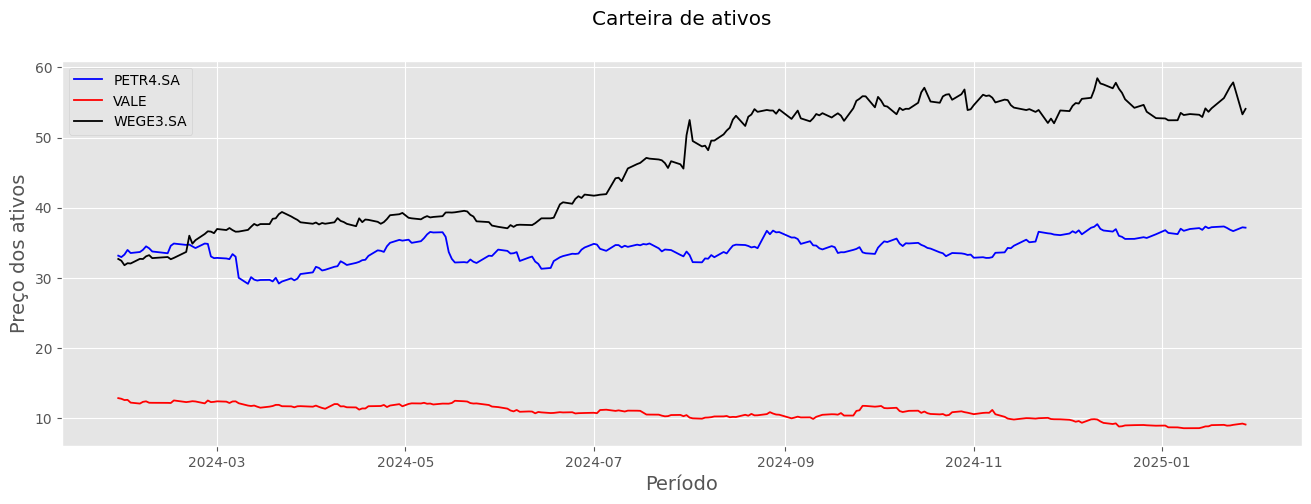

In [267]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Carteira de ativos', pad=26)
plt.plot(carteira.index, carteira['PETR4.SA'], color='blue', linewidth=1.3, label='PETR4.SA')
plt.plot(carteira['VALE'], color='red', linewidth=1.3, label='VALE')
plt.plot(carteira['WEGE3.SA'], color='black', linewidth=1.3, label='WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Preço dos ativos', fontsize=14)
plt.legend();


#### Normalizando os dados do ibovespa

In [268]:
ibovespa_normalizado = ibovespa / ibovespa.iloc[0]
ibovespa_normalizado.head()

Ticker,^BVSP
Date,
2024-01-29,1.000000
2024-01-30,0.991432
2024-01-31,0.994156
2024-02-01,0.999829
2024-02-02,0.989720


#### Carteira Normalizada

In [269]:
carteira_normalizada = carteira / carteira.iloc[0]
carteira_normalizada.head()

Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-01-29,1.000000,1.000000,1.000000
2024-01-30,0.993838,0.992852,0.992180
2024-01-31,1.004683,0.978556,0.972632
2024-02-01,1.024649,0.980701,0.981353
2024-02-02,1.011338,0.949964,0.980151


#### Gráfico : Ativos da Carteira e IBOVESPA

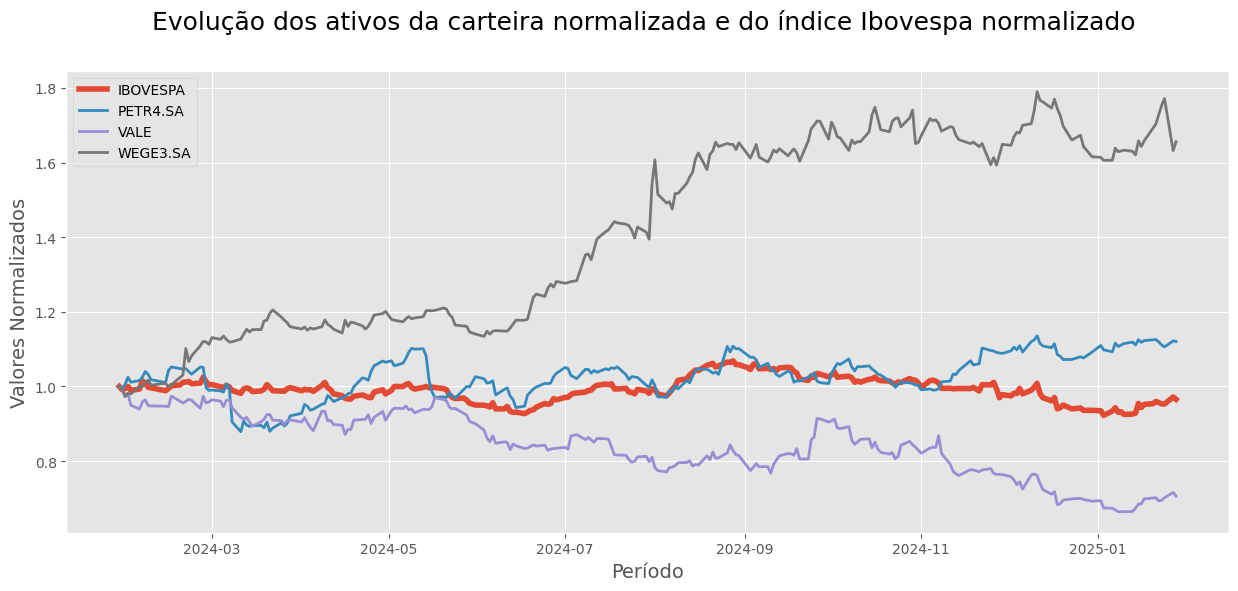

In [270]:
plt.figure(figsize=(15,6))
plt.title('Evolução dos ativos da carteira normalizada e do índice Ibovespa normalizado ', fontsize=18, pad=30)
plt.plot(ibovespa_normalizado.index, ibovespa_normalizado['^BVSP'], linewidth=4, label= 'IBOVESPA')
plt.plot(carteira_normalizada.index, carteira_normalizada['PETR4.SA'], linewidth=2, label= 'PETR4.SA')
plt.plot(carteira_normalizada.index, carteira_normalizada['VALE'], linewidth=2, label= 'VALE')
plt.plot(carteira_normalizada.index, carteira_normalizada['WEGE3.SA'], linewidth=2, label= 'WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Valores Normalizados', fontsize=14)
plt.legend();

In [271]:
# Gráfico de linhas
fig = px.line(ibovespa_normalizado,
               y='^BVSP',
               title='Variação do Ibovespa ao longo do tempo',
               color_discrete_sequence=['#6959CD']
               );

# Plotar 
fig.show()

In [272]:
# Criar dashboard


# Criando uma figura
figura = Dash.Figure()


# Adicionando o primeiro eixo
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['PETR4.SA'],
        mode='lines',
        name='PETR4.SA',
        marker_color='#ff7f0e',
        opacity=0.5,
    )
)



# Adicionando VALE
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['VALE'],
        mode='lines',
        name='VALE',
        marker_color='#d62728',
        opacity=0.5,
    )
)



# Adicionando a WEG3
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['WEGE3.SA'],
        mode='lines',
        name='WEGE3.SA',
        marker_color='#2ca02c'
    )
)

# Adicionando o IBOVESPA


figura.add_trace(
    Dash.Scatter(
        x=ibovespa_normalizado.index,
        y=ibovespa_normalizado['^BVSP'],
        mode='lines',
        name='IBOVESPA',
        marker_color='#4B0082'
    )
)



# Ajustes no layout
figura.update_layout(

    # título
    title='Evolução dos ativos da carteira normalizada e do índice Ibovespa normalizado ',
    # Tamanho
    titlefont_size=20,
    
    # Ajustando o eixo x
    xaxis=dict(
        title='Período Histórico',
        titlefont_size=14,
        tickfont_size=10
    ),


    # Ajustando o eixo y
    yaxis=dict(
        title='Valores Normalizados',
        titlefont_size=14,
        tickfont_size=10
    ),


    # Parâmetros para Legenda
    legend=dict(
        x=1,
        y=1
    )

)

## Importando dados do BACEN

###### Pesquisar do no google "BCB SGS"
###### Link: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
###### Pesquisar no google "api sgs bcb"
###### Link: https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88


### Função para extração de Dados do BACEN

In [273]:

def consulta_bcb(codigo_bcb):
    url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_bcb}/dados?formato=json"

    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace= True)
    return df

- ### Consulta: IPCA - em 12 meses

In [274]:
ipca_12M = consulta_bcb(13522)
ipca_12M
ipca_12M_2000 = ipca_12M[ipca_12M.index >= '2000-01-01']
ipca_12M_2000


,valor
data,
2000-01-01,8.85
2000-02-01,7.86
2000-03-01,6.92
2000-04-01,6.77
2000-05-01,6.47
...,...
2024-08-01,4.24
2024-09-01,4.42
2024-10-01,4.76


In [275]:
# Gráfico de linhas
fig = px.line(ipca_12M_2000,
               y='valor',
               title='Variação do IPCA em 12 meses ao longo do tempo',
               color_discrete_sequence=['#6959CD']
               );

# Plotar 
fig.show()

- ### Consulta: Taxa de juros - Meta Selic definida pelo Copom

In [276]:
selic_meta = consulta_bcb(432)
selic_meta_2000 = selic_meta[selic_meta.index >= '2000-01-01']
selic_meta_2000

,valor
data,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2025-01-25,12.25
2025-01-26,12.25
2025-01-27,12.25


In [277]:
fig = px.line(selic_meta_2000,
               y='valor',
               title='Taxa de juros - Meta Selic definida pelo Copom',
               color_discrete_sequence=['#53f8f9']
               );

# Plotar 
fig.show()





In [278]:
ipca_12M_2000

,valor
data,
2000-01-01,8.85
2000-02-01,7.86
2000-03-01,6.92
2000-04-01,6.77
2000-05-01,6.47
...,...
2024-08-01,4.24
2024-09-01,4.42
2024-10-01,4.76


In [279]:
selic_meta_2000

,valor
data,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2025-01-25,12.25
2025-01-26,12.25
2025-01-27,12.25


In [280]:
fig = Dash.Figure()

fig.add_trace(Dash.Scatter(
    x=selic_meta_2000.index,
    y=selic_meta_2000['valor'],
    mode='lines',
    name='Selic Meta', 
    line=dict(color='blue')  
))

fig.add_trace(Dash.Scatter(
    x=ipca_12M_2000.index,
    y=ipca_12M_2000['valor'],
    mode='lines',
    name='IPCA 12M', 
    line=dict(color='red')  
))

fig.update_layout(
    title='Evolução: Taxa SELIC META x IPCA-12M',
    xaxis_title='Data',
    yaxis_title='Valor',
    legend_title='Legenda'
)

fig.show()